In [22]:
import matplotlib.pyplot as plt
import numpy as np

from pyaw.parameters import OXYGEN_ATOMIC_MASS,calculate_electron_inertial_length,LIGHT_SPEED,calculate_electron_plasma_frequency,calculate_ion_thermal_gyroradius,calculate_ion_gyrofrequency,calculate_ion_acoustic_gyroradius,Alfven,calculate_plasma_density,calculate_approx_perpendicular_wavenumber,calculate_inertial_alfven_wave_electric_magnetic_field_ratio,calculate_kinetic_alfven_wave_electric_magnetic_field_ratio

In [23]:
# electron_number_density = 1e5
electron_number_density = 1e10
# electron_number_density = 1e11
# electron_number_density = 1e12

electron_temperature = 2000
ion_temperature = 1000

ion_mass = OXYGEN_ATOMIC_MASS

background_magnetic_field = 5e-5

In [24]:
electron_plasma_frequency = calculate_electron_plasma_frequency(electron_number_density=electron_number_density)

electron_inertial_length = calculate_electron_inertial_length(electron_plasma_frequency=electron_plasma_frequency,light_speed=LIGHT_SPEED)

ion_gyrofrequency = calculate_ion_gyrofrequency(background_magnetic_field=background_magnetic_field,ion_mass=ion_mass)

ion_thermal_gyroradius = calculate_ion_thermal_gyroradius(ion_temperature=ion_temperature,ion_mass=ion_mass,ion_gyrofrequency=ion_gyrofrequency)

ion_acoustic_gyroradius = calculate_ion_acoustic_gyroradius(electron_temperature=electron_temperature,ion_mass=ion_mass,ion_gyrofrequency=ion_gyrofrequency)

In [25]:
alfven = Alfven()
plasma_density = calculate_plasma_density(hydrogen_ion_number_density=0,helium_ion_number_density=0,oxygen_ion_number_density=electron_number_density)
alfven_velocity = alfven.calculate_alfven_velocity(background_magnetic_field=background_magnetic_field,plasma_density=plasma_density)
alfven_impedance = alfven.calculate_alfven_impedance(alfven_velocity=alfven_velocity)
alfven_admittance = alfven.calculate_alfven_admittance(alfven_impedance=alfven_impedance)

pedersen_conductance = 0.5

lower_boundary = alfven.calculate_lower_boundary(pedersen_conductance=pedersen_conductance)
upper_boundary = alfven.calculate_upper_boundary(alfven_velocity=alfven_velocity,pedersen_conductance=pedersen_conductance)

In [26]:
import numpy as np

wave_frequencies = np.arange(0,8.25,0.25)
satellite_velocity = 7.6e3

perpendicular_wavenumber = calculate_approx_perpendicular_wavenumber(wave_frequency=wave_frequencies,spacecraft_speed=satellite_velocity)

In [27]:
inertial_alfven_wave_electric_magnetic_field_ratio = calculate_inertial_alfven_wave_electric_magnetic_field_ratio(alfven_velocity=alfven_velocity,perpendicular_wavenumber=perpendicular_wavenumber,electron_inertial_length=electron_inertial_length)

kinetic_alfven_wave_electric_magnetic_field_ratio = calculate_kinetic_alfven_wave_electric_magnetic_field_ratio(alfven_velocity=alfven_velocity,perpendicular_wavenumber=perpendicular_wavenumber,ion_acoustic_gyroradius=ion_acoustic_gyroradius)

In [28]:
inertial_alfven_wave_with_larmor_electric_magnetic_field_ratio = calculate_inertial_alfven_wave_electric_magnetic_field_ratio(alfven_velocity=alfven_velocity,perpendicular_wavenumber=perpendicular_wavenumber,electron_inertial_length=electron_inertial_length,ion_thermal_gyroradius=ion_thermal_gyroradius)

kinetic_alfven_wave_with_larmor_electric_magnetic_field_ratio = calculate_kinetic_alfven_wave_electric_magnetic_field_ratio(alfven_velocity=alfven_velocity,perpendicular_wavenumber=perpendicular_wavenumber,ion_acoustic_gyroradius=ion_acoustic_gyroradius,ion_thermal_gyroradius=ion_thermal_gyroradius)

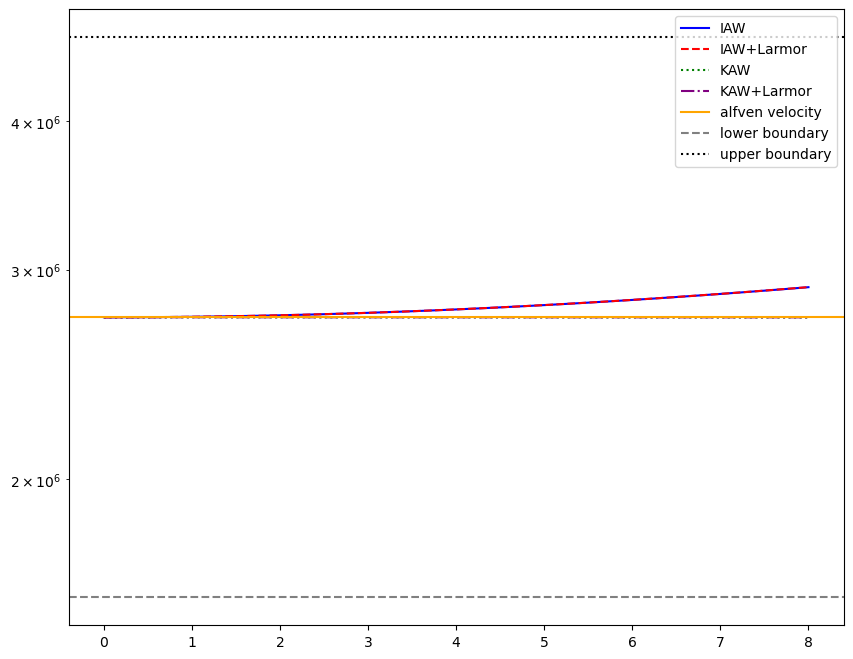

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(wave_frequencies, inertial_alfven_wave_electric_magnetic_field_ratio,
         label='IAW', color='blue', linestyle='-')
plt.plot(wave_frequencies, inertial_alfven_wave_with_larmor_electric_magnetic_field_ratio,
         label='IAW+Larmor', color='red', linestyle='--')
plt.plot(wave_frequencies, kinetic_alfven_wave_electric_magnetic_field_ratio,
         label='KAW', color='green', linestyle=':')
plt.plot(wave_frequencies, kinetic_alfven_wave_with_larmor_electric_magnetic_field_ratio,
         label='KAW+Larmor', color='purple', linestyle='-.')

plt.axhline(alfven_velocity, label='alfven velocity', color='orange', linestyle='-')
plt.axhline(lower_boundary, label='lower boundary', color='gray', linestyle='--')
plt.axhline(upper_boundary, label='upper boundary', color='black', linestyle=':')

plt.yscale('log')
plt.legend()
plt.show()
